### Reading the csv file into pandas dataframe

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)




<p> To see what our data set looks like we used <b>head()</b> to display the first five rows of the dataframe.</p>

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<p> We also checked the number of rows and columns in our dataframe using the <b>shape</b> method.</p>

In [4]:
df.shape

(500, 9)

We decided to drop the Serial No. column using <b>.drop()</b> as it serves no real purpose for data analysis.

In [5]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [6]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.shape

(500, 8)

We used the describe method to uderstand our dataframe better.

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


It's always important to know the correlation between each element in a data set in order to uderstand the degree of association between two variables. Thus, we also checked the correlation between the elements in our data set using corr().

In [9]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


From the above matrix we can see that there is a strong positive correlation between GRE score and TOEFL score, GRE score and CGPA, GRE score and Chance of Admit, TOEFL score and CGPA, TOEFL score and Chance of Admit and lastly; CGPA and Chance of Admit.

### Identify and handle missing value

<h4>Evaluating for Missing Data</h4>

We used Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [10]:
missing_data=df.isnull()
missing_data.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


<p>"True" stands for missing value, while "False" stands for not missing value.</p>

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we figured out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>

In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

GRE Score
False    500
Name: GRE Score, dtype: int64

TOEFL Score
False    500
Name: TOEFL Score, dtype: int64

University Rating
False    500
Name: University Rating, dtype: int64

SOP
False    500
Name: SOP, dtype: int64

LOR 
False    500
Name: LOR , dtype: int64

CGPA
False    500
Name: CGPA, dtype: int64

Research
False    500
Name: Research, dtype: int64

Chance of Admit 
False    500
Name: Chance of Admit , dtype: int64



<p> Based on the summary above, none of the columns containing missing data</p>

In [12]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [13]:
df[["SOP", "LOR"]] = df[["SOP", "LOR"]].astype("int")

In [14]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                    int64
LOR                    int64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

#### Detecting outliers using boxplots

In [15]:
import seaborn as sns

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


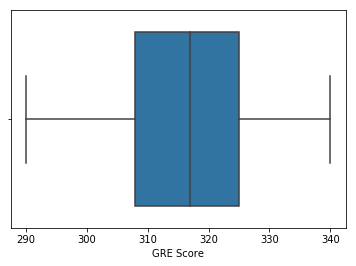

In [16]:
sns.boxplot(df['GRE Score'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


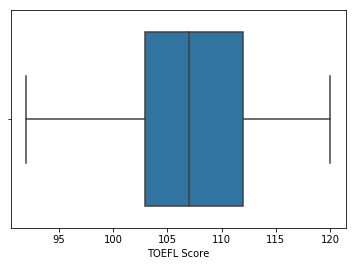

In [17]:
sns.boxplot(df['TOEFL Score'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


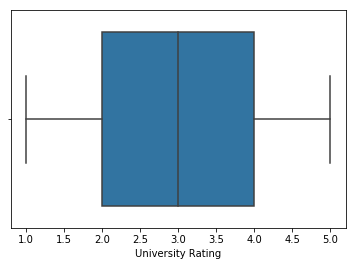

In [18]:
sns.boxplot(df['University Rating'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


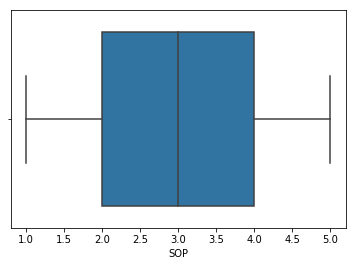

In [19]:
sns.boxplot(df['SOP'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


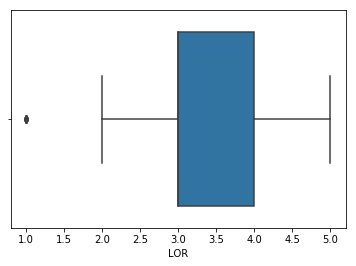

In [20]:
sns.boxplot(df['LOR'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


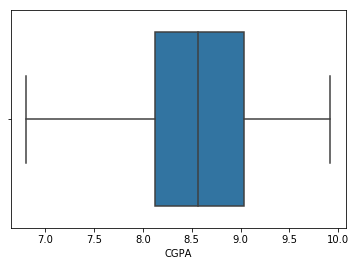

In [21]:
sns.boxplot(df['CGPA'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


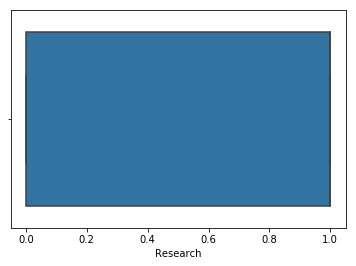

In [22]:
sns.boxplot(df['Research'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


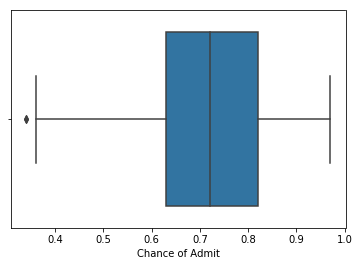

In [23]:
sns.boxplot(df['Chance of Admit'])

As seen from the box plots there seem to be outliers in LOR and Chance of Admit Values. We used Interquartile range rule for outliers to remove outliers.

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   2.0000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [25]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

     GRE Score  TOEFL Score  University Rating    SOP    LOR   CGPA  Research  \
0        False        False              False  False  False  False     False   
1        False        False              False  False  False  False     False   
2        False        False              False  False  False  False     False   
3        False        False              False  False  False  False     False   
4        False        False              False  False  False  False     False   
5        False        False              False  False  False  False     False   
6        False        False              False  False  False  False     False   
7        False        False              False  False  False  False     False   
8        False        False              False  False   True  False     False   
9        False        False              False  False  False  False     False   
10       False        False              False  False  False  False     False   
11       False        False 

TypeError: Could not compare [None] with block values

In [26]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(486, 8)

In [27]:
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4,4,9.65,1,0.92
1,324,107,4,4,4,8.87,1,0.76
2,316,104,3,3,3,8.00,1,0.72
3,322,110,3,3,2,8.67,1,0.80
4,314,103,2,2,3,8.21,0,0.65


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


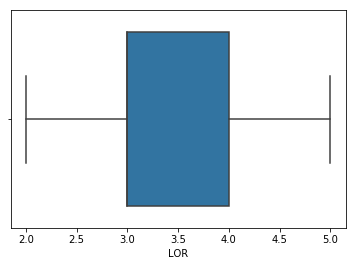

In [28]:
sns.boxplot(df1['LOR'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


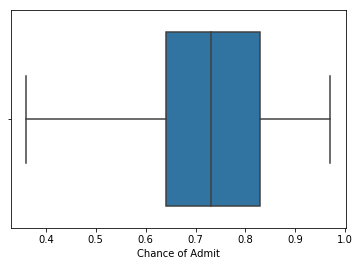

In [29]:
sns.boxplot(df1['Chance of Admit'])

In [30]:
df=df1.copy()
df.shape

(486, 8)

Since we are aiming to predict the chance of admit. We choose our three modeling algorithms to be: Linear Regression, Polynomial Regerssion and Ridge Regression.

Hypothesis 1: How important are GRE, TOEFL scores and CGPA important in getting an admit?

In [31]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

Selecting required features for analysis

In [32]:
sdf= df[["GRE Score","TOEFL Score","CGPA","Chance of Admit"]]
sdf.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


Visualizing each attribute wrt Chance of admit using histogram & scatterplot.

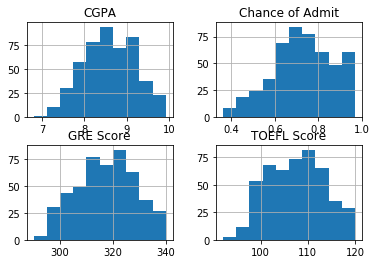

In [33]:
viz = sdf[["GRE Score","TOEFL Score","CGPA","Chance of Admit"]]
viz.hist()
plt.show()

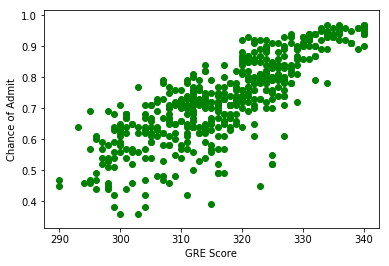

In [34]:
plt.scatter(sdf["GRE Score"], sdf["Chance of Admit"],  color='green')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

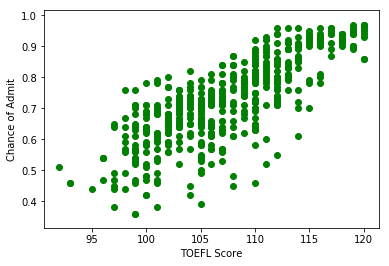

In [35]:
plt.scatter(sdf["TOEFL Score"], sdf["Chance of Admit"],  color='green')
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

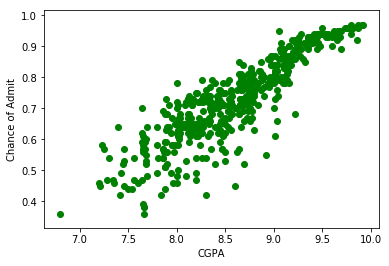

In [36]:
plt.scatter(sdf["CGPA"], sdf["Chance of Admit"],  color='green')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.show()

Creating Train & Test dataset:
We split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We created a mask to select random rows using np.random.rand() function

In [37]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

### Model building

1) Multiple regression model

In [101]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[["GRE Score","TOEFL Score","CGPA"]])
train_y1 = np.asanyarray(train[["Chance of Admit"]])
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[ 0.00170503  0.00295896  0.15133707]]
Intercept:  [-1.42793908]


Evaluation

In [102]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[["GRE Score","TOEFL Score","CGPA"]])
test_y1 = np.asanyarray(test[["Chance of Admit"]])
test_y_pred1 = regr1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred1 , test_y1) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.61


2) Polynomial Regression

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["GRE Score","TOEFL Score","CGPA"]])
train_y = np.asanyarray(train[["Chance of Admit"]])

test_x = np.asanyarray(test[["GRE Score","TOEFL Score","CGPA"]])
test_y = np.asanyarray(test[["Chance of Admit"]])


poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.00000000e+00,   3.37000000e+02,   1.18000000e+02, ...,
          1.34366600e+05,   1.09884550e+04,   8.98632125e+02],
       [  1.00000000e+00,   3.24000000e+02,   1.07000000e+02, ...,
          1.01552630e+05,   8.41842830e+03,   6.97864103e+02],
       [  1.00000000e+00,   3.16000000e+02,   1.04000000e+02, ...,
          8.65280000e+04,   6.65600000e+03,   5.12000000e+02],
       ..., 
       [  1.00000000e+00,   3.37000000e+02,   1.17000000e+02, ...,
          1.35110430e+05,   1.13977773e+04,   9.61504803e+02],
       [  1.00000000e+00,   3.30000000e+02,   1.20000000e+02, ...,
          1.37664000e+05,   1.09672320e+04,   8.73722816e+02],
       [  1.00000000e+00,   3.27000000e+02,   1.13000000e+02, ...,
          1.15431760e+05,   9.23454080e+03,   7.38763264e+02]])

<b>fit_transform()</b> takes the x values, and output a list of the data raised from power of 0 to 4 (since in our case we set the degree of our polynomial to 4).

We used <b>LinearRegression()</b> function to treat polynomial regression as linear regression so that we could analyze this model easily. 

In [99]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.00000000e+00   9.21869889e-01   2.06183913e-01  -1.79331397e+01
   -6.12296319e-03   5.37214713e-03   1.69222854e-01  -1.35395278e-02
    9.40033733e-02  -1.60475562e+00   1.35957139e-05  -2.65432104e-05
   -4.60963562e-04   6.87728781e-05  -3.80442215e-04   9.56959123e-03
   -4.38026293e-05   6.53789267e-04  -6.43224769e-03  -2.97196645e-02]]
Intercept:  [-53.61458054]


Evaluation

In [100]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.60


3) Regression tree

In [50]:
#Snippets of this code has been taken from geeks for geeks
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)
X = np.asanyarray(train[["GRE Score","TOEFL Score","CGPA"]])
y = np.asanyarray(train[["Chance of Admit"]])

regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Evaluation

In [51]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[["GRE Score","TOEFL Score","CGPA"]])
test_y = np.asanyarray(test[["Chance of Admit"]])
test_y_pred = regressor.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) )

Mean absolute error: 0.16
Residual sum of squares (MSE): 0.04
R2-score: 0.67


Finding the best model

In [96]:
d = {'Model': ['Multiple Linear Regression','Polynomial Regression','Regression Tree'], 'MAE': [0.05,0.05,0.16], 'MSE': [0.0,0.0,0.04],'R2-Score':[0.77,0.76,0.67]}
df_bestmodel = pd.DataFrame(data=d)
df_bestmodel

,MAE,MSE,Model,R2-Score
0,0.05,0.00,Multiple Linear Regression,0.77
1,0.05,0.00,Polynomial Regression,0.76
2,0.16,0.04,Regression Tree,0.67


In [97]:
 df_bestmodel.set_index('Model')

,MAE,MSE,R2-Score
Model,,,
Multiple Linear Regression,0.05,0.00,0.77
Polynomial Regression,0.05,0.00,0.76
Regression Tree,0.16,0.04,0.67


As we can see from the above dataframe all three models are good models to predict the chance of admit. But the best model amongst the 3 models is Multiple linear regression model since it has lowest mean absolute error as well as lowest mean squared error and the highest R2-Score. Polynomial regression has no mean squared error but it has higher mean absolute error and lower R2-Score when compared to multiple linear regression model. In case of regression tree it has higher mean absolute error and higher mean squared error than multiple linear regression and polynomial regression. It also has lowest R2-Score, hence it is not the best model when compared with other two. Thus, after comparing all three models we concluded that multiple linear regression is the best model. Also, we found out that GRE,TOEFL Scores and CGPA are really important variables in obtaining an admit from the university as higher GRE/TOEFL scores and higher CGPA would lead to greater chances of getting admit from a university.

Hypothesis 2: Does higher rating of SOP and LOR leads to greater chance of admit?

Selecting required features for analysis

In [54]:
sdf= df[["SOP","LOR","Chance of Admit"]]
sdf.head()

,SOP,LOR,Chance of Admit
0,4,4,0.92
1,4,4,0.76
2,3,3,0.72
3,3,2,0.80
4,2,3,0.65


Visualizing each attribute wrt Chance of admit using histogram & scatterplot.

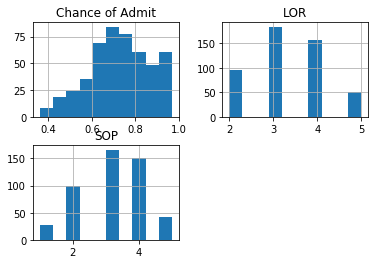

In [55]:
viz = sdf[["SOP","LOR","Chance of Admit"]]
viz.hist()
plt.show()

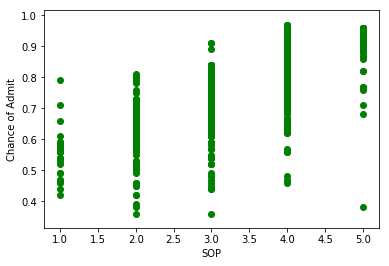

In [56]:
plt.scatter(sdf["SOP"], sdf["Chance of Admit"],  color='green')
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
plt.show()

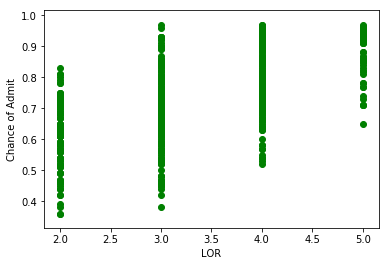

In [57]:
plt.scatter(sdf["LOR"], sdf["Chance of Admit"],  color='green')
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
plt.show()

Creating Train & Test dataset: We split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We created a mask to select random rows using np.random.rand() function

In [58]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

### Model building

1) Multiple linear Regression

In [59]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[["SOP","LOR"]])
train_y1 = np.asanyarray(train[["Chance of Admit"]])
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[ 0.06589362  0.04375024]]
Intercept:  [ 0.37544848]


Evaluation

In [60]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[["SOP","LOR"]])
test_y1 = np.asanyarray(test[["Chance of Admit"]])
test_y_pred1 = regr1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred1 , test_y1) )

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: -0.09


2.1) Polynomial Regression (Degree=4)

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["SOP","LOR"]])
train_y = np.asanyarray(train[["Chance of Admit"]])

test_x = np.asanyarray(test[["SOP","LOR"]])
test_y = np.asanyarray(test[["Chance of Admit"]])


poly = PolynomialFeatures(degree=4)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[   1.,    4.,    4., ...,  256.,  256.,  256.],
       [   1.,    3.,    3., ...,   81.,   81.,   81.],
       [   1.,    3.,    2., ...,   36.,   24.,   16.],
       ..., 
       [   1.,    4.,    5., ...,  400.,  500.,  625.],
       [   1.,    4.,    5., ...,  400.,  500.,  625.],
       [   1.,    4.,    4., ...,  256.,  256.,  256.]])

fit_transform() takes the x values, and output a list of the data raised from power of 0 to 4 (since in our case we set the degree of our polynomial to 4).

We used LinearRegression() function to treat polynomial regression as linear regression so that we could analyze this model easily.

In [62]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.          0.86740204  0.11529082 -0.15941381 -0.55281156  0.23340151
   0.03751738  0.02753297  0.12970048 -0.08406015 -0.00641651  0.00931424
  -0.01557262 -0.00282019  0.00643598]]
Intercept:  [-0.20042869]


Evaluation

In [63]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: -0.04


2.2) Polynomial Regression (Degree=12)

In [64]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["SOP","LOR"]])
train_y = np.asanyarray(train[["Chance of Admit"]])

test_x = np.asanyarray(test[["SOP","LOR"]])
test_y = np.asanyarray(test[["Chance of Admit"]])


poly = PolynomialFeatures(degree=12)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[  1.00000000e+00,   4.00000000e+00,   4.00000000e+00, ...,
          1.67772160e+07,   1.67772160e+07,   1.67772160e+07],
       [  1.00000000e+00,   3.00000000e+00,   3.00000000e+00, ...,
          5.31441000e+05,   5.31441000e+05,   5.31441000e+05],
       [  1.00000000e+00,   3.00000000e+00,   2.00000000e+00, ...,
          9.21600000e+03,   6.14400000e+03,   4.09600000e+03],
       ..., 
       [  1.00000000e+00,   4.00000000e+00,   5.00000000e+00, ...,
          1.56250000e+08,   1.95312500e+08,   2.44140625e+08],
       [  1.00000000e+00,   4.00000000e+00,   5.00000000e+00, ...,
          1.56250000e+08,   1.95312500e+08,   2.44140625e+08],
       [  1.00000000e+00,   4.00000000e+00,   4.00000000e+00, ...,
          1.67772160e+07,   1.67772160e+07,   1.67772160e+07]])

In [65]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  2.27668679e+02  -7.95626790e+02   1.42379636e+02  -1.16744822e+03
    1.20968438e+02   6.31486508e+01  -3.33465459e+02  -6.72407307e+01
    5.64210112e+01   4.37349681e+02  -1.22016148e+02   6.97945532e+02
    2.00054377e+01   3.78860622e+02  -2.23996437e+02   6.93936081e+02
    5.81730500e+02   5.15209554e+02   4.05353472e+02   2.60620217e+02
    1.54516375e+02   1.08954617e+03   9.71700008e+02   8.44502506e+02
    6.97240245e+02   5.31654109e+02   3.33777092e+02   4.17483421e+02
    1.50993435e+03   1.36869434e+03   1.10563808e+03   9.13822736e+02
    6.71849560e+02   3.77409989e+02   2.44851678e+02   1.02252751e+03
    1.42940394e+03   1.32615699e+03   8.17624092e+02   6.35239216e+02
    3.62152085e+02  -1.41918932e+02  -2.42194700e+02  -4.97140886e+02
    2.26420440e+03  -4.60775612e+02   2.28155046e+02  -7.26227106e+02
   -1.46533555e+03  -1.54965755e+03  -1.80961141e+03  -3.23737186e+02
   -7.75390203e+02  -1.83702200e+03   3.92760237e+03  -3.47094958e+03
    2

In [66]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.02


We can see by comparing our polynomial regression models that building a model with degree 12 has lower R2-Score (-0.01) but the MAE and MSE is really high which means that the model captures noise and it is a case of overfitting. Hence, we choose model with degree 4 for our final comparison. 

3) Regression Tree

In [67]:
#Snippets of this code has been taken from geeks for geeks
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)
X = np.asanyarray(train[["SOP","LOR"]])
y = np.asanyarray(train[["Chance of Admit"]])

regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Evaluation

In [68]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[["SOP","LOR"]])
test_y = np.asanyarray(test[["Chance of Admit"]])
test_y_pred = regressor.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) )

Mean absolute error: 0.14
Residual sum of squares (MSE): 0.03
R2-score: -0.08


Finding the best model

In [69]:
d = {'Model': ['Multiple Linear Regression','Polynomial Regression','Regression Tree'], 'MAE': [0.08,0.08,0.15], 'MSE': [0.01,0.01,0.04],'R2-Score':[-0.12,-0.06,-0.07]}
df_bestmodel = pd.DataFrame(data=d)
df_bestmodel

,MAE,MSE,Model,R2-Score
0,0.08,0.01,Multiple Linear Regression,-0.12
1,0.08,0.01,Polynomial Regression,-0.06
2,0.15,0.04,Regression Tree,-0.07


In [70]:
 df_bestmodel.set_index('Model')

,MAE,MSE,R2-Score
Model,,,
Multiple Linear Regression,0.08,0.01,-0.12
Polynomial Regression,0.08,0.01,-0.06
Regression Tree,0.15,0.04,-0.07


As we saw from our scatter plot matrices there seem to be a little or no correlation between the SOP/LOR and chance of admit. Hence, looking at our 3 models we got a very low R2-Score. The relatively high R2-score was observed for Polynomial Regression (-0.06). Polynomial regression also has lower mean absolute error and mean squared error when compared to Regression tree. Hence, amongst our three models Polynomial Regression would be the best one. But over-all it can be concluded that higher rating of SOP and LOR does not necessarily lead to higher chances of admit. Maybe SOP and LOR coupled with other variables might lead to more accurate predictions but just SOP and LOR are not ideal variables to predict the chance of obtaining an admit from the university.

Hypothesis 3: What are the chances of getting an admit from the university considering all variables (i.e. GRE Score,TOEFL Score,University Rating, SOP, LOR, CGPA, Research)?

Selecting required features for analysis

In [75]:
sdf= df[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research","Chance of Admit"]]
sdf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4,4,9.65,1,0.92
1,324,107,4,4,4,8.87,1,0.76
2,316,104,3,3,3,8.00,1,0.72
3,322,110,3,3,2,8.67,1,0.80
4,314,103,2,2,3,8.21,0,0.65


Creating Train & Test dataset: We split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We created a mask to select random rows using np.random.rand() function

In [76]:
msk = np.random.rand(len(df)) < 0.8
train = sdf[msk]
test = sdf[~msk]

1) Multiple linear Regression

In [77]:
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
train_y1 = np.asanyarray(train[["Chance of Admit"]])
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [[ 0.00122465  0.00259086  0.00744852  0.0044241   0.01127914  0.12796797
   0.0224082 ]]
Intercept:  [-1.1244021]


Evaluation

In [78]:
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
test_y1 = np.asanyarray(test[["Chance of Admit"]])
test_y_pred1 = regr1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred1 , test_y1) )

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.66


2) Polynomial Reggression

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
train_y = np.asanyarray(train[["Chance of Admit"]])

test_x = np.asanyarray(test[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
test_y = np.asanyarray(test[["Chance of Admit"]])


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[   1.    ,  337.    ,  118.    , ...,   93.1225,    9.65  ,    1.    ],
       [   1.    ,  324.    ,  107.    , ...,   78.6769,    8.87  ,    1.    ],
       [   1.    ,  316.    ,  104.    , ...,   64.    ,    8.    ,    1.    ],
       ..., 
       [   1.    ,  337.    ,  117.    , ...,   97.4169,    9.87  ,    1.    ],
       [   1.    ,  330.    ,  120.    , ...,   91.3936,    9.56  ,    1.    ],
       [   1.    ,  327.    ,  113.    , ...,    0.    ,    0.    ,    0.    ]])

In [90]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  2.72798376e-06  -8.76880827e-01   2.70275034e+00  -9.77006535e-01
    1.46539908e+00   2.21950390e+00  -1.74188423e+01   3.85243275e+00
   -1.35559411e-03   1.40793035e-02  -1.79135149e-02  -7.16778978e-02
   -4.04409703e-03   1.70379918e-01   2.31678117e-04  -5.44612522e-02
    1.45116425e-01   2.03534394e-01  -6.06831887e-02   1.17974856e-01
   -6.59227681e-02  -4.46178484e-01   7.70869772e-01   3.65216690e-01
   -1.15923510e+00   6.59202912e-01  -1.01624427e+00   5.12901607e-01
    8.94987326e-02  -3.49486900e-01  -4.57735681e-01   3.46306372e-01
    3.85087076e-01  -1.65920922e+00  -8.35314000e-01   3.85243246e+00
    1.35528909e-05  -8.85337763e-05  -4.66652490e-05   1.96468801e-04
    7.68474792e-05  -3.15176760e-04  -4.24209388e-04   2.39299469e-04
   -2.82538515e-06  -4.21135063e-04  -2.92308727e-04  -9.12261773e-04
    2.11004141e-03   1.40968342e-03  -2.77673363e-03  -8.78257508e-04
    6.40147000e-03  -5.95615371e-03   3.77499537e-03  -2.40188512e-03
   -1

Evaluation

In [91]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.31


3) Regression Trees

In [85]:
#Snippets of this code has been taken from geeks for geeks
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)
X = np.asanyarray(train[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
y = np.asanyarray(train[["Chance of Admit"]])

regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Evaluation

In [86]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research"]])
test_y = np.asanyarray(test[["Chance of Admit"]])
test_y_pred = regressor.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_pred - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_pred , test_y) )

Mean absolute error: 0.15
Residual sum of squares (MSE): 0.03
R2-score: 0.50


Finding the best model

In [92]:
d = {'Model': ['Multiple Linear Regression','Polynomial Regression','Regression Tree'], 'MAE': [0.05,0.06,0.15], 'MSE': [0.00,0.01,0.03],'R2-Score':[0.66,0.31,0.50]}
df_bestmodel = pd.DataFrame(data=d)
df_bestmodel

,MAE,MSE,Model,R2-Score
0,0.05,0.00,Multiple Linear Regression,0.66
1,0.06,0.01,Polynomial Regression,0.31
2,0.15,0.03,Regression Tree,0.50


In [93]:
 df_bestmodel.set_index('Model')

,MAE,MSE,R2-Score
Model,,,
Multiple Linear Regression,0.05,0.00,0.66
Polynomial Regression,0.06,0.01,0.31
Regression Tree,0.15,0.03,0.50


As we can see from the above dataframe all three models are decent models to predict the chance of admit. But the best model amongst the 3 models is Multiple linear regression model since it has lowest mean absolute error as well as lowest mean squared error and the highest R2-Score. Polynomial regression has lower mean squared error and lower mean absolute error but lower R2-Score when compared to regression tree model. In case of regression tree it has higher mean absolute error and higher mean squared error than multiple linear regression. It also has lower R2-Score, hence it is not the best model when compared with linear regression model. Thus, after comparing all three models we concluded that multiple linear regression is the best model. Also, we found out that considering all variables for prediction does not lead to higher accuracy results as we got a model with better fit when we considered only GRE Score, TOEFL Score and CGPA.